# Titanic
Work on the [Titanic](https://www.kaggle.com/c/titanic) kaggle competition.

## Overall idea
Build several logistic regression modelto classify people based on their features. I'll start from a very basic one, i.e. logistic regression with just the available features and add more complexity step by step on both feature handling (e.g. feature normalisation, etc.) and the model itself (e.g. more features, more complex models).

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import utils

from sklearn.linear_model import LogisticRegression

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

% matplotlib inline

## Load the data
Load the data and do some very preliminary exploration.

In [2]:
data_path = '/Users/francesco/PersonalProjects/data/kaggle-titanic/'

In [3]:
df_train = pd.read_csv('{}/train.csv'.format(data_path), skipinitialspace=True)

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

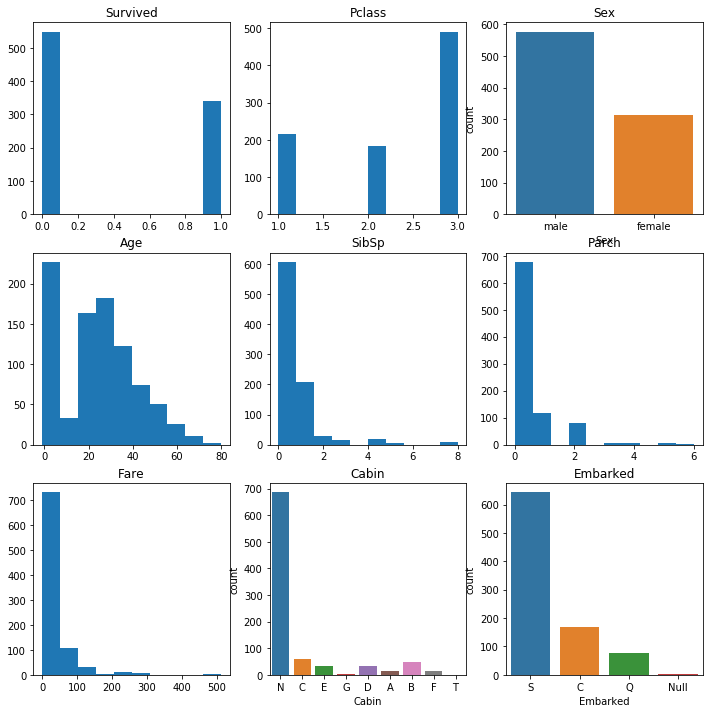

In [8]:
# plot all "plottable" variables
vars = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

fig, axes = plt.subplots(3, 3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        idx = 3*i + j
        var = vars[idx]
        axes[i,j].set_title(var)
        if is_string_dtype(df_train[var]):
            df_tmp = df_train[var].fillna('Null')
            if var == 'Cabin':
                df_tmp = df_train[var].fillna('Null').str[0]
            sb.countplot(x=df_tmp, ax=axes[i,j])
        else:
            df_tmp = df_train[var].fillna(-1)
            _ = axes[i,j].hist(df_tmp)
        

### Comments on raw vars
`Age` can be `null`, and this happens ha sizeable amount of times (177 times out of 891). At a first look this doesn't seem to be (strongly) correlated to any of the other features.

Third class (`Pclass` = 3) people are not assigned any cabin (`Cabin` = Nan).

### Relations between variables
Try to study the relations between some variables.

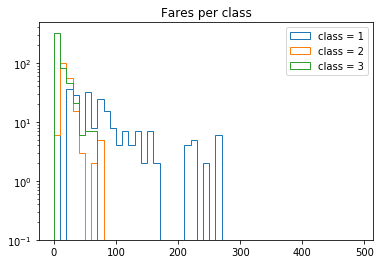

In [10]:
plt.figure()
plt.title('Fares per class')
for c in np.sort(df_train.Pclass.unique()):
    _ = plt.hist(df_train[ df_train.Pclass==c ].Fare, bins=range(0,500,10), histtype='step', label='class = {}'.format(c), log=True)
plt.legend(loc='best')

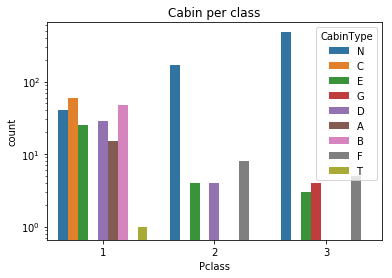

In [11]:
df_tmp = df_train.assign(CabinType = lambda x : x.Cabin.fillna('Null').str[0])

plt.figure()
plt.title('Cabin per class')
sb.countplot(x='Pclass', data=df_tmp, hue='CabinType', log=True)

What is written above is not entirely true: cabins are available for all classes, but they have some kind of distribution. The majority of 3rd class people do not have a cabin, but also some second and first class people do not have a cabin. G cabins seem to be reseved to 3rd class people, while some other types are reserved to second and first class people. The only kind of cabins available for all the three classes are E cabins.

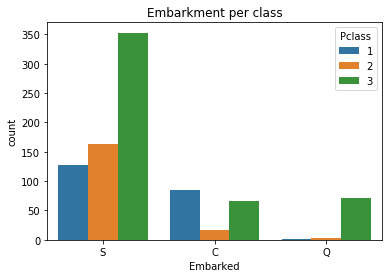

In [12]:
plt.figure()
plt.title('Embarkment per class')
sb.countplot(x='Embarked', data=df_train, hue='Pclass', log=False)

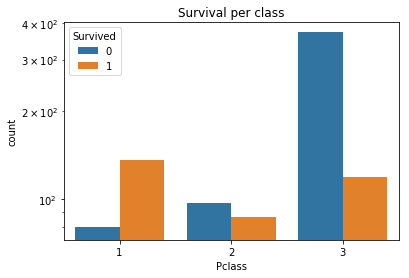

In [13]:
plt.figure()
plt.title('Survival per class')
sb.countplot(x='Pclass', data=df_train, hue='Survived', log=True)

## Data manipulation
In this section data are manipulated in order to make them a suitable input for some ML method. There are two kinds of manipulations: something related to feature engineering and something related to the actual data format.

### v_00: no engineering
In this version I just use the input features as they are. Neverthelsess some data preprocessing is anyway needed:
* replace `NaN`s with a fixed value
* replace `str` value with numeric values

In [19]:
# replace NaNs with -1
for c in df_train.columns:
    df_train[c] = df_train[c].fillna(-1)

In [20]:
# split the features from the target
feat_list = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
x_train = df_train[feat_list].values
y_train = df_train['Survived'].values

Now build the model.

In [21]:
m_00 = LogisticRegression()

In [22]:
m_00.fit(x_train, y_train)

ValueError: could not convert string to float: 'Q'